train.csv: A full training dataset with the following attributes:

* id: unique id for a news article
* title: the title of a news article
* author: author of the news article
* text: the text of the article; could be incomplete
* label: a label that marks the article as potentially unreliable
* 1: unreliable
* 0: reliable

source: https://www.kaggle.com/c/fake-news/overview

In [1]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 
from wordcloud import WordCloud
import re

# 1. Data Exploration

In [2]:
df = pd.read_csv('dataset/train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
df.shape

(20800, 5)

In [4]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [6]:
# adding a new column that combines all the fields: title, author, and text
df['all'] = df['title'] + ' ' + df['author'] + ' ' + df['text']
df.head()

,id,title,author,text,label,all
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


In [7]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
all       2515
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
 5   all     18285 non-null  object
dtypes: int64(2), object(4)
memory usage: 975.1+ KB


In [9]:
##### can the sum nan values of 'all' be higher than the other columns? ######

In [10]:
# dropping rows where title = NaN
df_drop = df.dropna(subset=['all']).reset_index(drop=True)
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18285 entries, 0 to 18284
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      18285 non-null  int64 
 1   title   18285 non-null  object
 2   author  18285 non-null  object
 3   text    18285 non-null  object
 4   label   18285 non-null  int64 
 5   all     18285 non-null  object
dtypes: int64(2), object(4)
memory usage: 857.2+ KB


In [11]:
df_drop.head(10)

,id,title,author,text,label,all
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0,Jackie Mason: Hollywood Would Love Trump if He...
6,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0,Benoît Hamon Wins French Socialist Party’s Pre...
7,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0,"A Back-Channel Plan for Ukraine and Russia, Co..."
8,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0,Obama’s Organizing for Action Partners with So...
9,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca..."


In [ ]:
### using wordcloud to visualize common words for both reliable and unrealible news ###
reliable = df_drop[df['label'] == 0]
unreliable = df_drop[df['label'] == 1]

In [ ]:
# converting to list
rel_words = reliable['all'].astype(str).tolist()
unrel_words = unreliable['all'].astype(str).tolist()

In [ ]:
# joining into one string
rel_words_onestring = " ".join(rel_words)
unrel_words_onestring = " ".join(unrel_words)

In [ ]:
# plotting reliable news
plt.figure(figsize=(20,20));
plt.imshow(WordCloud().generate(rel_words_onestring));
plt.show();

In [ ]:
# plotting unrealiable news
plt.figure(figsize=(20,20));
plt.imshow(WordCloud().generate(unrel_words_onestring));
plt.show();

In [ ]:
# reliable vs unrealiable split
print( 'Unreliable percentage =', round((len(unreliable) / len(df_drop) )*100, 2),"%")
print( 'Reliable percentage =', round((len(reliable) / len(df_drop) )*100, 2),"%")

In [ ]:
# visualizing reliable vs unrealiable
sns.countplot(df['label'], label = "Count");

# 2. Preprocessing

In [ ]:
# splitting by words, and removing stopwords (previously installed nltk in the PythonML env: python -m nltk.downloader all)
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')

def text_cleaning(message):
    
    message_lower = message.str.lower()
    # removing possesives and contractions
    p_c_removed = message_lower.replace("’s","", regex=True)
    # replacing '\n' with blank space
    blank_spc_removed = p_c_removed.replace('\n',' ', regex=True)
    # removing special characters (regex)
    spec_char_removed = blank_spc_removed.replace('[^A-Za-z0-9\s]+', '',regex=True)
    # removing leading and trailing spaces
    space_removed = spec_char_removed.str.strip()
    # split (tokenization)
    split = space_removed.str.split()
    # removing stop words
    stop_words_removed = [w for w in split if w not in stopwords.words('english')] # if not w in stopwords.words('english')
    
    
#     stem_removed = [stemmer.stem(word) for word in split if word not in stopwords.words('english')]
#     cleaned = ' '.join(stem_removed)
    return print(stop_words_removed) # stop_words_removed #stem_removed

In [ ]:
import warnings
warnings.simplefilter('ignore', FutureWarning)
# clean_data = df_drop['all'].apply(text_cleaning)
clean_data = text_cleaning(df_drop['all'])

In [ ]:
print(clean_data[0])

In [ ]:
# converting list of words into vectors
from sklearn.feature_extraction.text import CountVectorizer
vectorizer =  CountVectorizer(analyzer=text_cleaning, stop_words='english', ngram_range=(1,2), lowercase=False) # consider max_features and other params
news_countervectorizer = vectorizer.fit_transform(df_drop['all'])

---

In [12]:
df_drop['all'].head(10)

0    House Dem Aide: We Didn’t Even See Comey’s Let...
1    FLYNN: Hillary Clinton, Big Woman on Campus - ...
2    Why the Truth Might Get You Fired Consortiumne...
3    15 Civilians Killed In Single US Airstrike Hav...
4    Iranian woman jailed for fictional unpublished...
5    Jackie Mason: Hollywood Would Love Trump if He...
6    Benoît Hamon Wins French Socialist Party’s Pre...
7    A Back-Channel Plan for Ukraine and Russia, Co...
8    Obama’s Organizing for Action Partners with So...
9    BBC Comedy Sketch "Real Housewives of ISIS" Ca...
Name: all, dtype: object

In [13]:
################## No function ###############
# splitting by words, and removing stopwords (previously installed nltk in the PythonML env: python -m nltk.downloader all)
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')

df_clean = df_drop.copy()
df_clean['all'] = df_clean['all'].str.lower()
# removing possesives and contractions
df_clean['all'] = df_clean['all'].replace("’s","", regex=True)
# replacing '\n' with blank space
df_clean['all'] = df_clean['all'].replace('\n',' ', regex=True)
# removing special characters (regex)
df_clean['all'] = df_clean['all'].replace('[^A-Za-z0-9\s]+', '',regex=True)
# removing leading and trailing spaces
df_clean['all'] = df_clean['all'].str.strip()
# split (tokenization)
df_clean['all'] = df_clean['all'].str.split()

In [14]:
df_clean['all'].head()

0    [house, dem, aide, we, didnt, even, see, comey...
1    [flynn, hillary, clinton, big, woman, on, camp...
2    [why, the, truth, might, get, you, fired, cons...
3    [15, civilians, killed, in, single, us, airstr...
4    [iranian, woman, jailed, for, fictional, unpub...
Name: all, dtype: object

In [15]:
type(df_clean['all'][0])

list

In [ ]:
# removing stop words
# stop_words_removed = [w for w in df_clean['all'] if w not in stopwords.words('english')] # if not w in stopwords.words('english')

# stop_words_removed = df_clean['all'].apply(lambda x: [y for y in x if y not in stopwords.words('english')])
    
# stem_removed = [stemmer.stem(word) for word in df_clean['all'] if word not in stopwords.words('english')]
#     cleaned = ' '.join(stem_removed)


In [ ]:
df_clean['all'].tail()

In [ ]:
len(df_clean['all'])

In [16]:
stop_words_removed = []
for i in range(0, len(df_clean['all'])):
    stop_words = [w for w in df_clean['all'][i] if w not in stopwords.words('english')]
    stop_words = ' '.join(stop_words)
    stop_words_removed.append(stop_words)
print(stop_words_removed[0])

house dem aide didnt even see comey letter jason chaffetz tweeted darrell lucus house dem aide didnt even see comey letter jason chaffetz tweeted darrell lucus october 30 2016 subscribe jason chaffetz stump american fork utah image courtesy michael jolley available creative commonsby license apologies keith olbermann doubt worst person world weekfbi director james comey according house democratic aide looks like also know secondworst person well turns comey sent nowinfamous letter announcing fbi looking emails may related hillary clinton email server ranking democrats relevant committees didnt hear comey found via tweet one republican committee chairmen know comey notified republican chairmen democratic ranking members house intelligence judiciary oversight committees agency reviewing emails recently discovered order see contained classified information long letter went oversight committee chairman jason chaffetz set political world ablaze tweet fbi dir informed fbi learned existence e

In [ ]:
type(stop_words_removed[0][0])

In [17]:
# converting list of words into vectors
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()#ngram_range=(1,2)) # consider max_features and other params

X = vectorizer.fit_transform(stop_words_removed)

In [18]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# 3. Training the Model

In [19]:
y = df_drop['label']

In [20]:
display(X.shape, y.shape)

(18285, 170604)

(18285,)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [22]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
model = NB_classifier.fit(X_train, y_train)

In [23]:
predicted = model.predict(X_test)

print(np.mean(predicted == y_test))

0.9389354721108275


# 4. Classification Report & Confusion Matrix

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

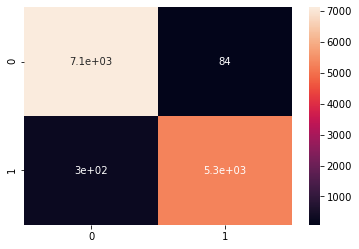

In [25]:

y_predict_train = NB_classifier.predict(X_train)
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True);

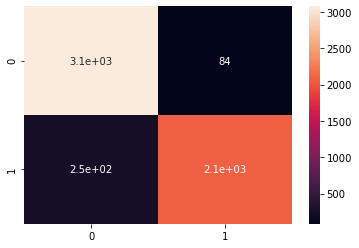

In [27]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True);

In [28]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      3160
           1       0.96      0.89      0.93      2326

    accuracy                           0.94      5486
   macro avg       0.94      0.93      0.94      5486
weighted avg       0.94      0.94      0.94      5486



# 5. Saving the Model

In [30]:
import joblib

# Save to file in the current working directory
joblib_file = "News_ish.pkl"
joblib.dump(model, joblib_file)

['News_ish.pkl']

In [31]:
# Load from file
joblib_model = joblib.load(joblib_file)

In [35]:
score = joblib_model.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
y_predict = model.predict(X_test)

Test score: 93.89 %


In [65]:
type(X_test)

scipy.sparse.csr.csr_matrix

In [66]:
X_test.shape

(5486, 170604)

In [67]:
input_message = str(input())

Minnesota is reporting 45 new COVID-19 deaths and more than 9,000 coronavirus cases in an unusual release Saturday that covers two days worth of data. The latest figures cap a week when the number of COVID-19 deaths reported by the state each day fluctuated greatly. The Minnesota Department of Health reported 72 deaths for the 24-hour period ending at 4 p.m. on Tuesday, and a record 101 deaths reported for the 24-hour period ending at 4 p.m. Wednesday. For the 48-hour period ending Friday afternoon, the state reported fewer than 50 deaths. Funeral home directors and medical examiners need to file reports within five days of death, according to the Health Department. It's possible they pushed to file reports before Thanksgiving, so they wouldn't have to do so on the holiday weekend, said Kris Ehresmann, the state's director for infectious diseases. It's harder to say why the two-day totals released Saturday for new cases and completed tests were low, Ehresmann said, but the holiday coul

In [62]:
'''Minnesota is reporting 45 new COVID-19 deaths and more than 9,000 coronavirus cases in an unusual release Saturday that covers two days worth of data.
The latest figures cap a week when the number of COVID-19 deaths reported by the state each day fluctuated greatly.
The Minnesota Department of Health reported 72 deaths for the 24-hour period ending at 4 p.m. on Tuesday, and a record 101 deaths reported for the 24-hour period ending at 4 p.m. Wednesday. For the 48-hour period ending Friday afternoon, the state reported fewer than 50 deaths.
Funeral home directors and medical examiners need to file reports within five days of death, according to the Health Department. It's possible they pushed to file reports before Thanksgiving, so they wouldn't have to do so on the holiday weekend, said Kris Ehresmann, the state's director for infectious diseases.
It's harder to say why the two-day totals released Saturday for new cases and completed tests were low, Ehresmann said, but the holiday could have influenced decisions about whether people sought testing. Throughout the pandemic, COVID numbers released on Mondays have tended to be lower due to reduced testing and reporting activity on weekends.
With the latest figures, Minnesota has now seen 304,023 positive cases, 16,423 hospitalizations and 3,521 deaths since the pandemic arrived here in March.
Residents of long-term care and assisted-living facilities accounted for 23 of the newly announced deaths, and 2,378 deaths since the start of the pandemic.
The state's two-day count of 9,040 new cases came on a low volume of 36,601 newly completed tests, according to the Star Tribune's coronavirus tracker.
Minnesota did not plan to update its dashboard for hospital capacity on Saturday, but the Star Tribune tracker shows 380 new admissions reported over the two-day period. The one-day figures on each of the last three Saturdays were 283, 271 and 201 new admissions.
Daily reports of new admissions typically include patients who have entered the hospital at some point over the last several days — not just on the most recent day.
Numbers released Saturday show health care workers have accounted for 22,292 positive cases — up by more than 200 cases from last week. More than 257,000 people who were infected no longer need to be isolated.
COVID-19 is a viral respiratory illness caused by a new coronavirus that surfaced late last year. People at greatest risk include those 65 and older, residents of long-term care facilities and those with underlying medical conditions.
Those health problems range from lung disease and serious heart conditions to severe obesity and diabetes. People undergoing treatment for failing kidneys also run a greater risk, as do those with cancer and other conditions where treatments suppress immune systems.
Most patients with COVID-19 don't need to be hospitalized. Most illnesses involve mild or moderate symptoms; many cases are asymptomatic.'''

In [68]:
input_message

"Minnesota is reporting 45 new COVID-19 deaths and more than 9,000 coronavirus cases in an unusual release Saturday that covers two days worth of data. The latest figures cap a week when the number of COVID-19 deaths reported by the state each day fluctuated greatly. The Minnesota Department of Health reported 72 deaths for the 24-hour period ending at 4 p.m. on Tuesday, and a record 101 deaths reported for the 24-hour period ending at 4 p.m. Wednesday. For the 48-hour period ending Friday afternoon, the state reported fewer than 50 deaths. Funeral home directors and medical examiners need to file reports within five days of death, according to the Health Department. It's possible they pushed to file reports before Thanksgiving, so they wouldn't have to do so on the holiday weekend, said Kris Ehresmann, the state's director for infectious diseases. It's harder to say why the two-day totals released Saturday for new cases and completed tests were low, Ehresmann said, but the holiday cou

In [85]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [94]:
bad_char = [i for i in string.punctuation]
print(bad_char)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [103]:
# function to preprocess new text
# def text_input(message):

message = input_message.lower()
# removing possesives and contractions
message = message.replace("'s","")
# replacing '\n' with blank space
message = message.replace('\n',' ')
# removing special characters (regex)
message_nochar = ''.join((filter(lambda i: i not in bad_char, message)))
# # removing leading and trailing spaces
message_nospace = message_nochar.strip()
# # split (tokenization)
message_pp = message_nospace.split()
# # return message_pp

In [106]:
stop_words = [w for w in message_pp if w not in stopwords.words('english')]
message_stop_words_removed = ' '.join(stop_words)

In [107]:
print(message_stop_words_removed)

minnesota reporting 45 new covid19 deaths 9000 coronavirus cases unusual release saturday covers two days worth data latest figures cap week number covid19 deaths reported state day fluctuated greatly minnesota department health reported 72 deaths 24hour period ending 4 pm tuesday record 101 deaths reported 24hour period ending 4 pm wednesday 48hour period ending friday afternoon state reported fewer 50 deaths funeral home directors medical examiners need file reports within five days death according health department possible pushed file reports thanksgiving wouldnt holiday weekend said kris ehresmann state director infectious diseases harder say twoday totals released saturday new cases completed tests low ehresmann said holiday could influenced decisions whether people sought testing throughout pandemic covid numbers released mondays tended lower due reduced testing reporting activity weekends latest figures minnesota seen 304023 positive cases 16423 hospitalizations 3521 deaths sin

In [112]:
list_test = [message_stop_words_removed]
list_test

['minnesota reporting 45 new covid19 deaths 9000 coronavirus cases unusual release saturday covers two days worth data latest figures cap week number covid19 deaths reported state day fluctuated greatly minnesota department health reported 72 deaths 24hour period ending 4 pm tuesday record 101 deaths reported 24hour period ending 4 pm wednesday 48hour period ending friday afternoon state reported fewer 50 deaths funeral home directors medical examiners need file reports within five days death according health department possible pushed file reports thanksgiving wouldnt holiday weekend said kris ehresmann state director infectious diseases harder say twoday totals released saturday new cases completed tests low ehresmann said holiday could influenced decisions whether people sought testing throughout pandemic covid numbers released mondays tended lower due reduced testing reporting activity weekends latest figures minnesota seen 304023 positive cases 16423 hospitalizations 3521 deaths s

In [114]:
list_test.shape

AttributeError: 'list' object has no attribute 'shape'

In [115]:
new_input_vectorized = CountVectorizer.fit(list_test)

# new_input_vectorized.toarray()

TypeError: fit() missing 1 required positional argument: 'raw_documents'